In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
tips = sns.load_dataset('tips')
titanic = pd.read_csv('Datasets/Titanic-Dataset.csv')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Correlation Heatmaps with Hierarchical Clustering
- To visualize correlations between multiple numerical variables and group similar features

D:\anaconda\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


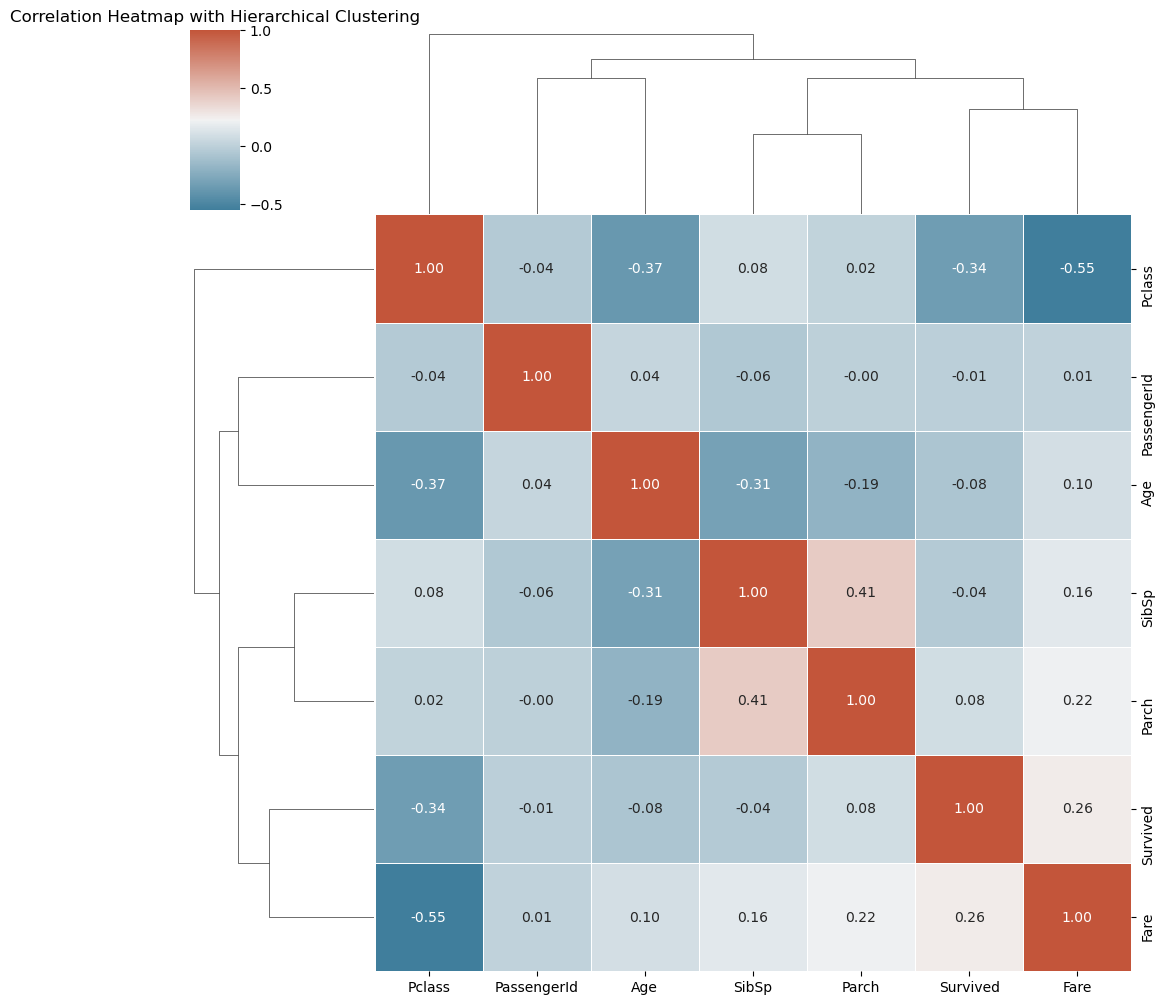

In [9]:
numeric_titanic = titanic.select_dtypes(include='number')
corr = numeric_titanic.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.clustermap(corr, cmap=cmap, annot=True, fmt=".2f", 
               square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap with Hierarchical Clustering')
plt.show()

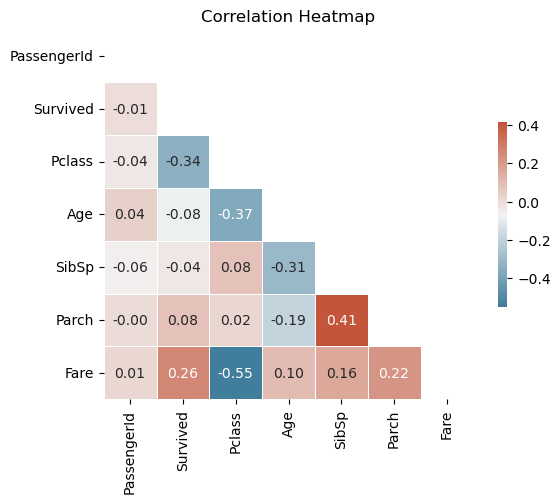

In [8]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()

### Parallel Coordinates Plot
- When to use: To visualize how multiple features relate across different data points

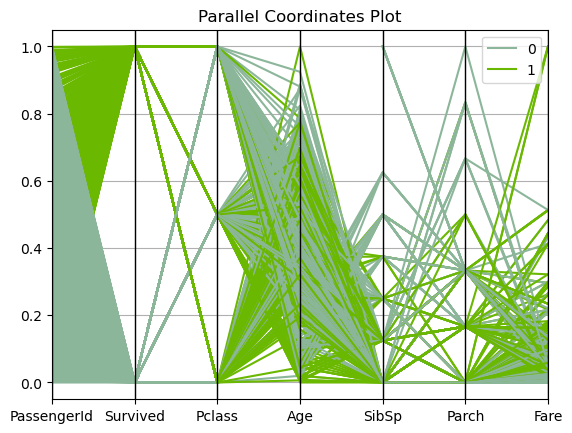

In [15]:
from pandas.plotting import parallel_coordinates

# Normalize the data
normalized_df = (numeric_titanic - numeric_titanic.min()) / (numeric_titanic.max() - numeric_titanic.min())

# Create a column for coloring
normalized_df['class'] = numeric_titanic['Survived']

# Create the plot
parallel_coordinates(normalized_df, 'class')
plt.title('Parallel Coordinates Plot')
plt.show()

### Pair Plots with Regression Lines and Distribution Curves
- When to use: To visualize pairwise relationships between numerical variables

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

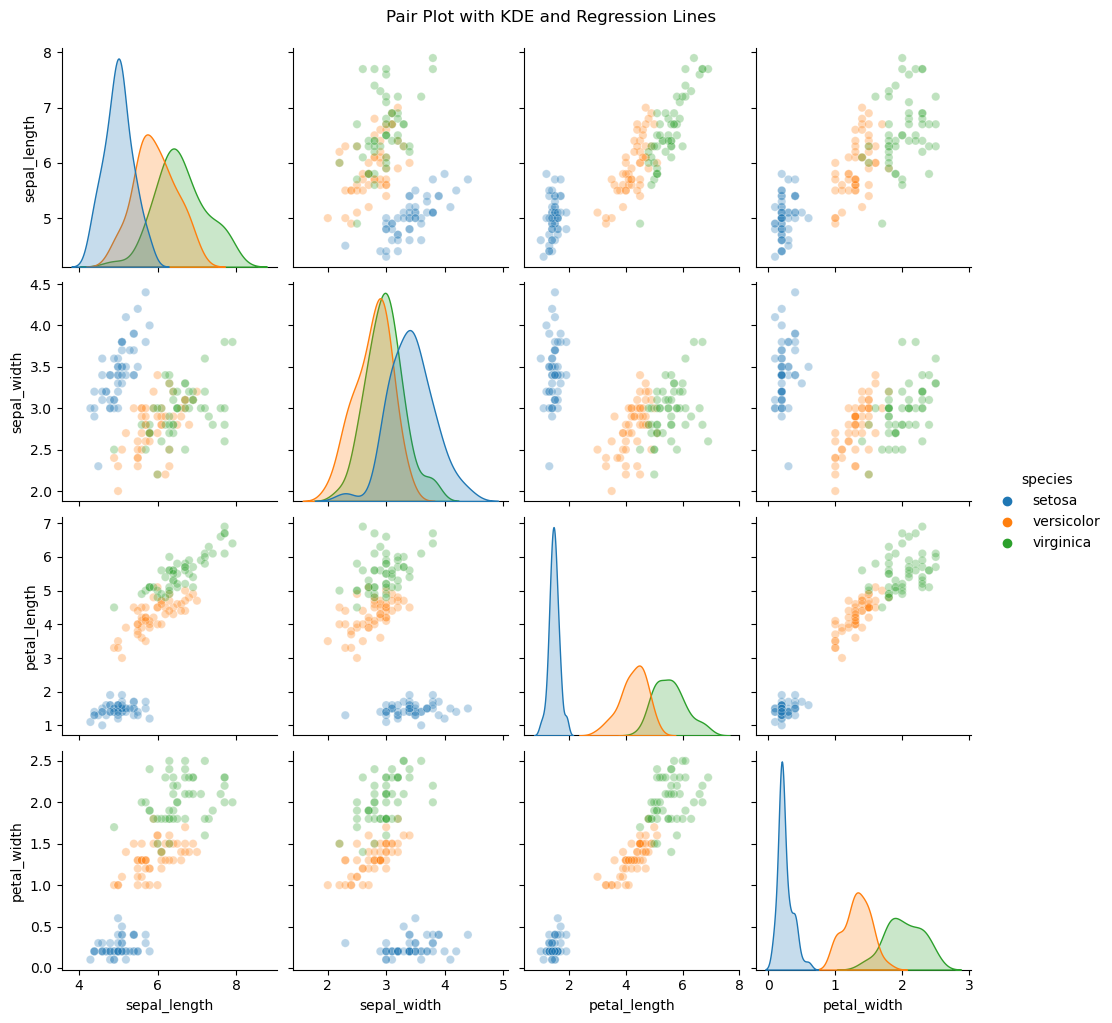

In [19]:
sns.pairplot(iris, hue='species', diag_kind='kde', 
             plot_kws={'alpha': 0.3})
plt.suptitle('Pair Plot with KDE and Regression Lines', y=1.02)
plt.show()

### 3D Scatter Plots with Color-coded Fourth Dimension
- When to use: To visualize relationships between four variables simultaneously

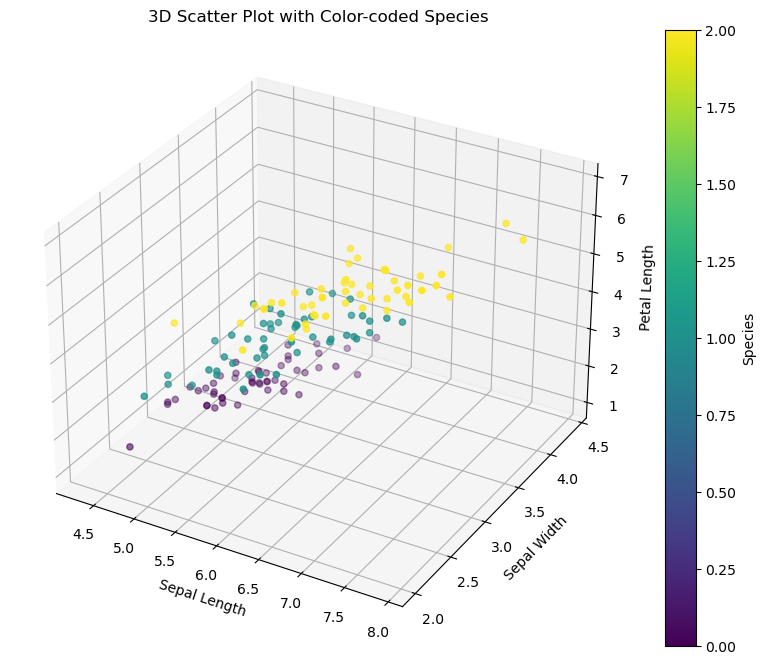

In [23]:
from sklearn.datasets import load_iris

# Load the iris dataset and create a DataFrame
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target

# Example: Encode species as colors (if not already numeric)
iris['color_var'] = iris['species']

# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], iris['petal length (cm)'],
                     c=iris['color_var'], cmap='viridis')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.colorbar(scatter, label='Species')
plt.title('3D Scatter Plot with Color-coded Species')
plt.show()


### Principal Component Analysis (PCA) Biplots
- When to use: To reduce dimensionality while preserving important relationships

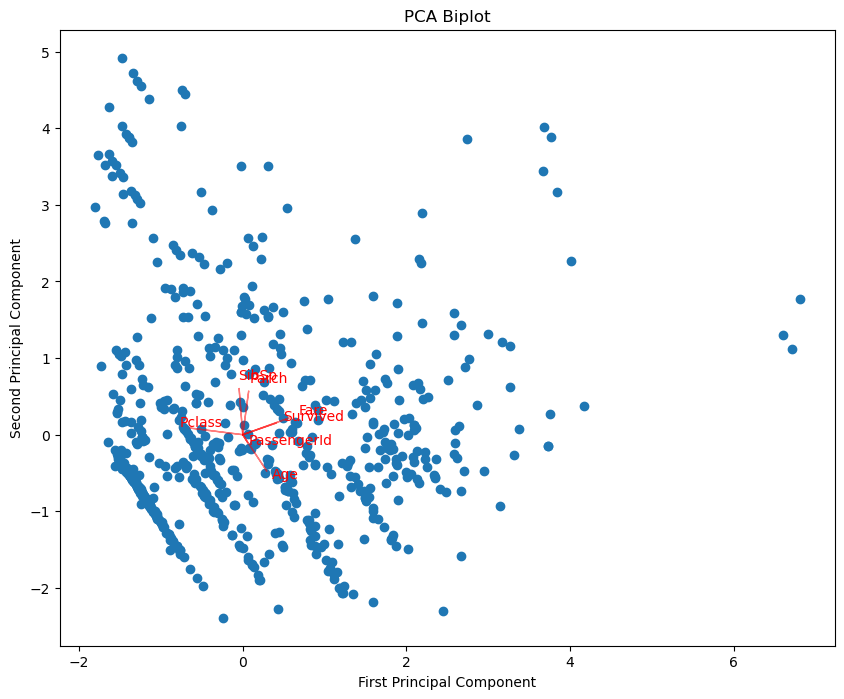

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_titanic.dropna())

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result[:, :2], columns=['PC1', 'PC2'])

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Biplot')

# Add feature vectors
for i, feature in enumerate(numeric_titanic.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.2, pca.components_[1, i]*1.2, feature, color='r')

plt.show()

### Scatter plots
- When to use: To visualize the relationship between two continuous variables.

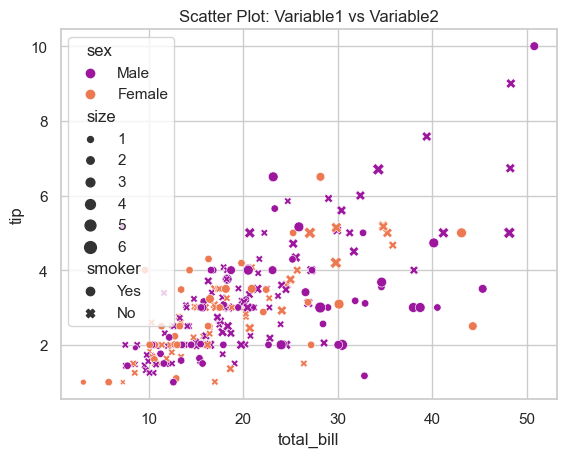

In [35]:
sns.scatterplot(data=df, x = tips['total_bill'],y = tips['tip'],
               style=tips['smoker'], palette='plasma', hue=tips['sex'],
               size=tips['size'])
plt.title('Scatter Plot: Variable1 vs Variable2')
plt.show()

### Line plots
- When to use: To show trends between two variables, often used for time series data.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



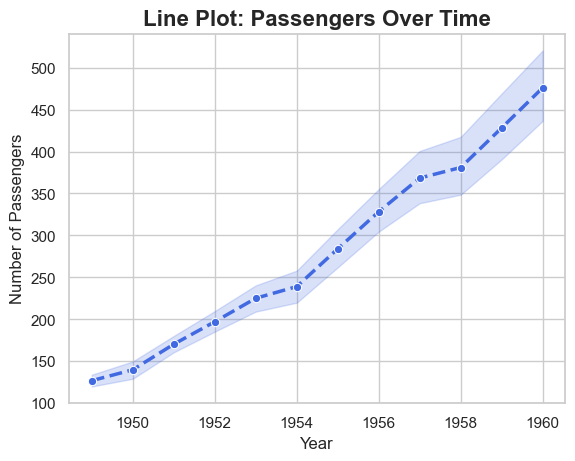

In [37]:
# Create the line plot with color and markers
sns.lineplot(data=flights, x='year', y='passengers', 
             marker='o', color='royalblue', linewidth=2.5, linestyle='--')

# Add a title and display the plot
plt.title('Line Plot: Passengers Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

### Box plots
 - When to use: To compare distributions of a continuous variable across categories.

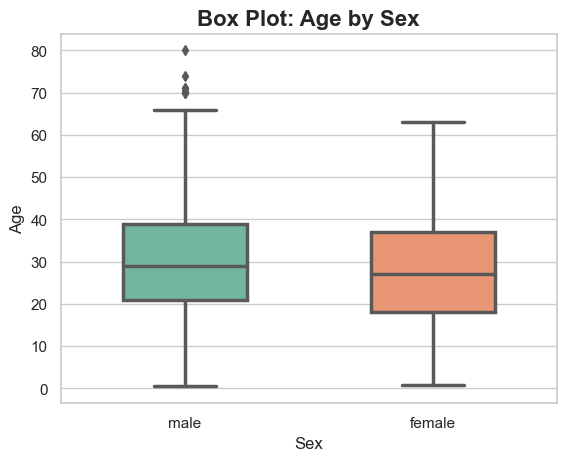

In [40]:
# Create the box plot with a custom color palette
sns.boxplot(data=titanic, x='Sex', y='Age', palette='Set2', linewidth=2.5, width=0.5)

# Add a title and labels, and display the plot
plt.title('Box Plot: Age by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

### Pair plots
 - When to use: To create a grid of scatter plots for multiple variable combinations.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na op

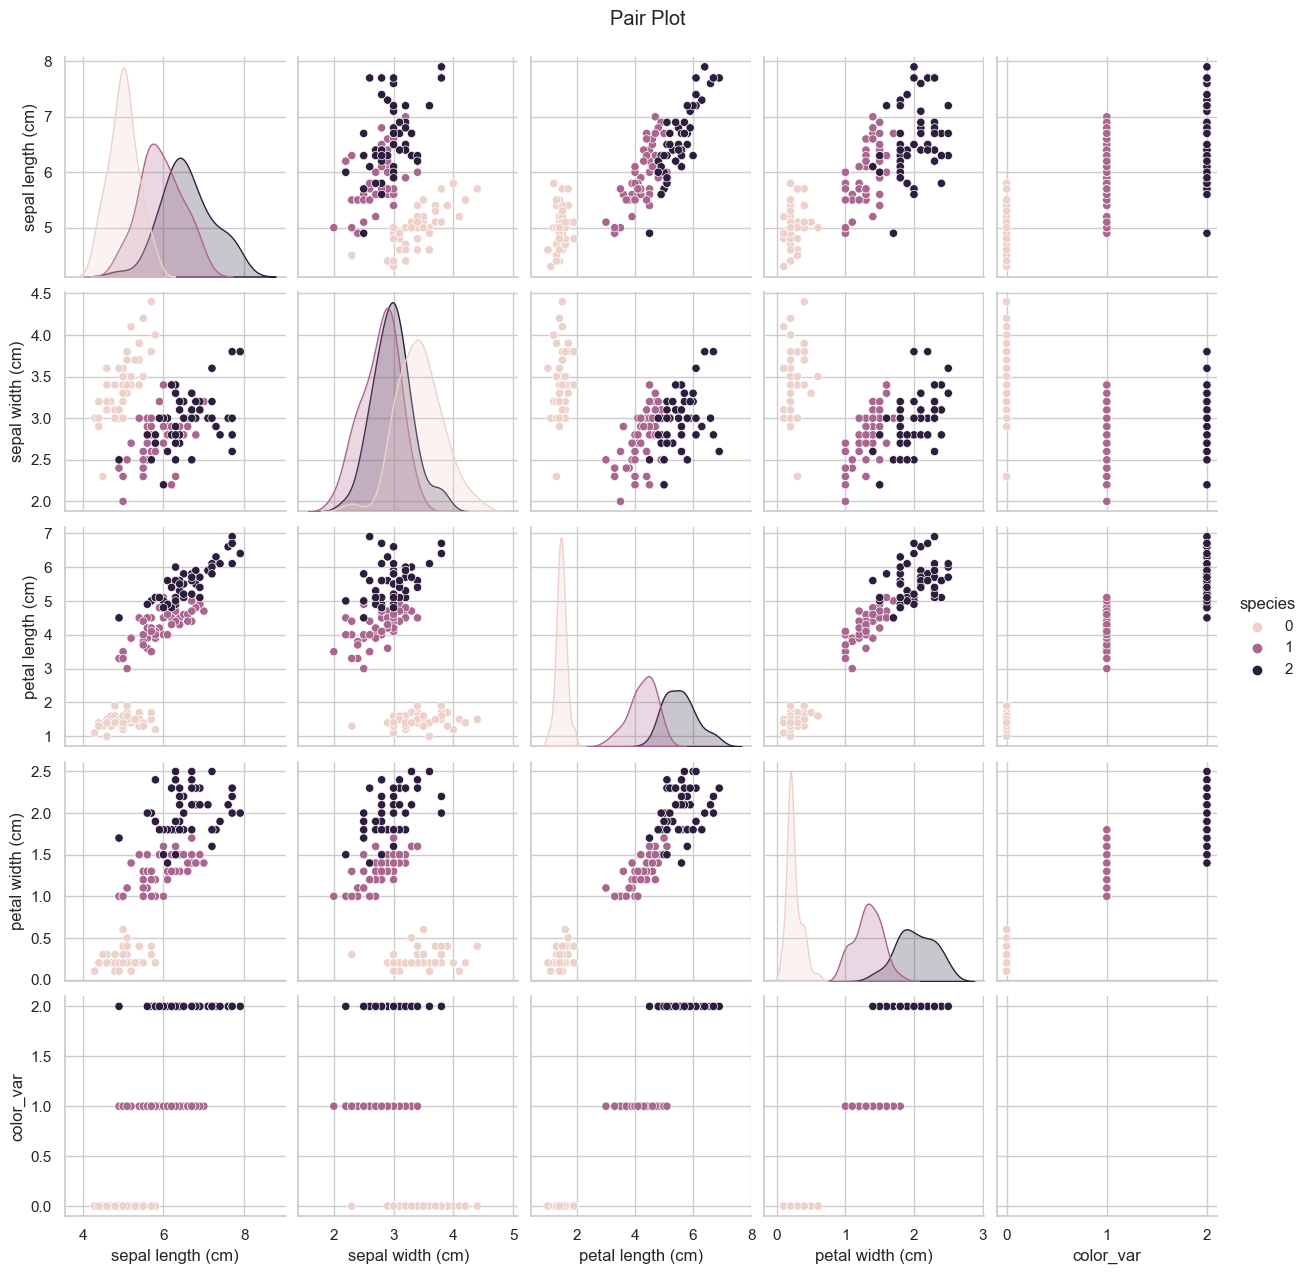

In [42]:
sns.pairplot(iris, hue='species')
plt.suptitle('Pair Plot', y=1.02)
plt.show()